# Dimensionality reduction via linear discriminant analysis
Principal component analysis (PCA) and linear discriminant analysis (LDA) are two data preprocessing linear transformation techniques that are often used for dimensionality reduction in order to select relevant features that can be used in the final machine learning algorithm. PCA is an unsupervised algorithm that is used for feature extraction in high-dimensional and correlated data. PCA achieves dimensionality reduction by transforming features into orthogonal component axes of maximum variance in a dataset. An implementation of PCA using iris dataset can be found here: https://github.com/bot13956/principal_component_analysis_iris_dataset

The goal of LDA is to find the feature subspace that optimizes class separability. Hence, LDA is a supervised algorithm. In this code, we illustrate the implementation of LDA using the iris dataset.

An in-depth description of PCA and LDA can be found in this book: Python Machine Learning by Sebastian Raschka, Chapter 5.

author: Benjamin O. Tayo

date: 11-06-2018 

Reference: Python Machine Learning by Sebastian Raschka, Chapter 5

# Import necessary libraries

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
np.set_printoptions(precision=4)

# Read dataset

In [13]:
df = pd.read_csv('Iris.csv', index_col = None)

In [16]:
df.drop('Id', axis = 1, inplace = True)
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


# Encode categorical class labels

In [18]:
from sklearn.preprocessing import LabelEncoder
class_le = LabelEncoder()
y = class_le.fit_transform(df['Species'].values)

In [20]:
from sklearn.preprocessing import StandardScaler
stdsc = StandardScaler()
X_train_std = stdsc.fit_transform(df[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']].values) 

# Construct within-class covariant scatter matrix S_W

In [21]:
S_W = np.zeros((4,4))
for i in range(3):
    S_W += np.cov(X_train_std[y==i].T)

In [7]:
S_W

array([[1.1672, 0.783 , 0.3461, 0.1839],
       [0.783 , 1.8616, 0.2181, 0.3051],
       [0.3461, 0.2181, 0.1796, 0.0954],
       [0.1839, 0.3051, 0.0954, 0.2178]])

# Construct between-class scatter matrix S_B

In [8]:
N=np.bincount(y) # number of samples for given class
vecs=[]
[vecs.append(np.mean(X_train_std[y==i],axis=0)) for i in range(3)] # class means
mean_overall = np.mean(X_train_std, axis=0) # overall mean
S_B=np.zeros((4,4))
for i in range(3):
    S_B += N[i]*(((vecs[i]-mean_overall).reshape(4,1)).dot(((vecs[i]-mean_overall).reshape(1,4))))

In [9]:
S_B

array([[ 92.8059, -54.7706, 113.8033, 113.6835],
       [-54.7706,  58.7821, -73.7624, -68.4292],
       [113.8033, -73.7624, 141.1978, 139.7382],
       [113.6835, -68.4292, 139.7382, 139.3254]])

# Calculate sorted eigenvalues and eigenvectors of  inverse(S_W)dot(S_B)

In [10]:
eigen_vals, eigen_vecs = np.linalg.eig(np.linalg.inv(S_W).dot(S_B))
eigen_pairs = [(np.abs(eigen_vals[i]), eigen_vecs[:,i]) for i in range(len(eigen_vals))]
eigen_pairs = sorted(eigen_pairs,key=lambda k: k[0], reverse=True)
print('Eigenvalues in decreasing order:\n')
for eigen_val in eigen_pairs:
    print(eigen_val[0])

Eigenvalues in decreasing order:

1581.3259321867629
13.60077632816224
1.5798874091613385e-13
1.5798874091613385e-13


# Plot main LDA components

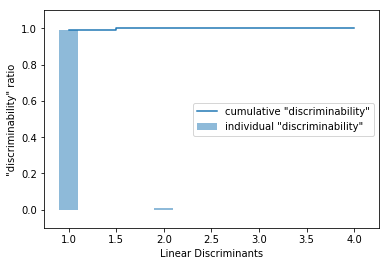

In [11]:
tot = sum(eigen_vals.real)
discr = [(i / tot) for i in sorted(eigen_vals.real, reverse=True)]
cum_discr = np.cumsum(discr)
plt.bar(range(1, 5), discr, width=0.2,alpha=0.5, align='center',label='individual "discriminability"')
plt.step(range(1, 5), cum_discr, where='mid',label='cumulative "discriminability"')
plt.ylabel('"discriminability" ratio')
plt.xlabel('Linear Discriminants')
plt.ylim([-0.1, 1.1])
plt.legend(loc='best')
plt.show()

# Project original features onto the new feature space

In [12]:
W=np.hstack((eigen_pairs[0][1][:, ].reshape(4,1),eigen_pairs[1][1][:, ].reshape(4,1))).real
X_train_lda = X_train_std.dot(W)

# Plot transformed features in LDA subspace

In [13]:
data=pd.DataFrame(X_train_lda)
data['class']=y
data.columns=["LD1","LD2","class"]
data.head()

,LD1,LD2,class
0,1.790936,0.115414,0
1,1.583202,-0.265463,0
2,1.663881,-0.083657,0
3,1.514646,-0.225901,0
4,1.807076,0.189973,0


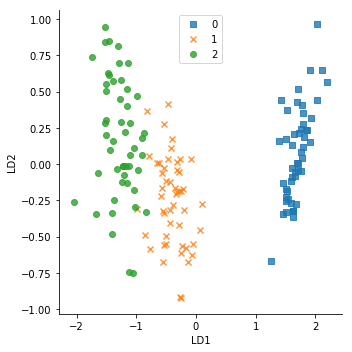

In [14]:
markers = ['s', 'x','o']
sns.lmplot(x="LD1", y="LD2", data=data, markers=markers,fit_reg=False, hue='class', legend=False)
plt.legend(loc='upper center')
plt.show()

# LDA implementation using scikit-learn

In [22]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis(n_components=2)
X_train_lda = lda.fit_transform(X_train_std, y)

In [23]:
data=pd.DataFrame(X_train_lda)
data['class']=y
data.columns=["LD1","LD2","class"]
data.head()

,LD1,LD2,class
0,8.084953,0.328454,0
1,7.147163,-0.755473,0
2,7.511378,-0.238078,0
3,6.837676,-0.642885,0
4,8.157814,0.540639,0


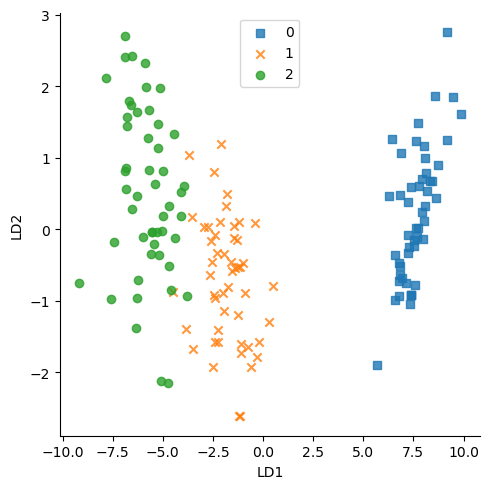

In [24]:
markers = ['s', 'x','o']
colors = ['r', 'b','g']
sns.lmplot(x="LD1", y="LD2", data=data, hue='class', markers=markers,fit_reg=False,legend=False)
plt.legend(loc='upper center')
plt.show()